## Практические задания к уроку 5
## Тема “Элементы теории вероятностей”


### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def roulette():
    pool = [
        0, 7, 15, 19, 4, 21, 2, 25, 17, 12, 6, 27,
        13, 36, 11, 30, 8, 23, 10, 5, 24, 3, 33, 1,
        20, 14, 31, 9, 22, 18, 29, 32, 28, 34, 35, 16, 26
    ]
    num = random.choice(pool)
    if pool.index(num) % 2 != 0 and num != 0:
        color = 'red'
    elif pool.index(num) % 2 == 0 and num != 0:
        color = 'black'
    else:
        color = ''
    return num, color

In [9]:
result = pd.Series([0 for _ in range(37)], index=[i for i in range(37)])

In [10]:
for _ in range(1500):
    result[roulette()[0]] += 1

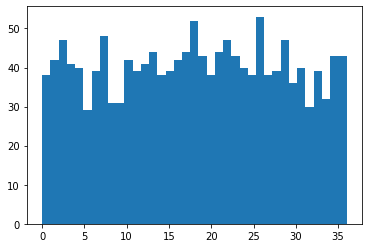

In [11]:
plt.hist(result.index, bins=37, weights=result)
plt.show()

### 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.


In [12]:
date = pd.DataFrame({'count': [0 for _ in range(37)]})

In [13]:
pool = [
    0, 7, 15, 19, 4, 21, 2, 25, 17, 12, 6, 27,
    13, 36, 11, 30, 8, 23, 10, 5, 24, 3, 33, 1,
    20, 14, 31, 9, 22, 18, 29, 32, 28, 34, 35, 16, 26
]
for i in date.index:
    if pool.index(i) % 2 != 0 and i != 0:
        date.loc[i, 'color'] = 'red'
    elif pool.index(i) % 2 == 0 and i != 0:
        date.loc[i, 'color'] = 'black'

In [14]:
for _ in range(10000):
    num = roulette()[0]
    date.loc[num, 'count'] += 1

In [15]:
# Вероятность выпадения красного:

P_red = date.loc[date['color'] == 'red', 'count'].sum() \
                                / date['count'].sum()
P_red

0.4834

In [16]:
# Вероятность выпадения красного:

P_black = date.loc[date['color'] == 'black', 'count'].sum() \
                                  / date['count'].sum()
P_black

0.4888

In [19]:
# Вероятность выпадения и красного и черного:

date.loc[~date['color'].isnull(), 'count'].sum() / date['count'].sum()

0.9722

### 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9.

In [21]:
import numpy as np

In [24]:
x = pd.DataFrame([np.random.rand(10) for _ in range(10)])

print(x)

          0         1         2         3         4         5         6  \
0  0.579765  0.839154  0.972910  0.884883  0.936945  0.442750  0.827743   
1  0.870038  0.758273  0.626102  0.374715  0.392642  0.059725  0.670891   
2  0.519296  0.564950  0.527600  0.553896  0.758291  0.712760  0.126544   
3  0.830720  0.276474  0.948963  0.895728  0.212141  0.981337  0.406578   
4  0.054135  0.919384  0.419448  0.959812  0.875668  0.863160  0.195092   
5  0.842854  0.481748  0.024815  0.574016  0.512503  0.879545  0.889198   
6  0.364043  0.080969  0.258370  0.260000  0.424295  0.140101  0.948247   
7  0.142718  0.433018  0.581575  0.679005  0.113785  0.930472  0.649196   
8  0.048702  0.303728  0.724646  0.899085  0.716733  0.736889  0.169306   
9  0.223599  0.717201  0.106729  0.398406  0.807341  0.226086  0.048752   

          7         8         9  
0  0.095067  0.279688  0.187721  
1  0.002924  0.426754  0.054687  
2  0.210579  0.420506  0.239272  
3  0.128344  0.226186  0.784897  
4  0

### и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

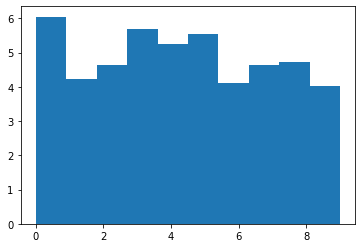

In [26]:
plt.hist(x.index, weights=x.T.sum())
plt.show()

### 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [27]:
import math

In [28]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(len(x)):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

3769 10000 0.3769


In [30]:
k = 3
n = 6

In [31]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

In [32]:
P = c * 1/2**n
P

0.3125

### 3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [33]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
x = a + b + c + d + f + e
for i in range(len(x)):
    if x[i] == 3:
        k += 1
print(k, n, k/n)

3110 10000 0.311


In [34]:
k = 2
n = 5

In [35]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

In [36]:
P = c * 1/2**n
P

0.3125

### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [37]:
import itertools

In [38]:
for p in itertools.permutations('012345', 2):
    print(*p, sep='')

01
02
03
04
05
10
12
13
14
15
20
21
23
24
25
30
31
32
34
35
40
41
42
43
45
50
51
52
53
54


In [40]:
n = 8
k = 4
n * (n - k + 1)

40

In [41]:
for p in itertools.combinations('012345', 2):
    print(*p, sep='')

01
02
03
04
05
12
13
14
15
23
24
25
34
35
45


In [42]:
n = 5
k = 3
math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

10.0

### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

$$
R = \frac {\sum(x_i - x_m)(y_i - y_m)}{\sqrt{(x_i - x_m)^2(y_i - y_m)^2}}
$$

In [43]:
from sklearn.metrics import r2_score

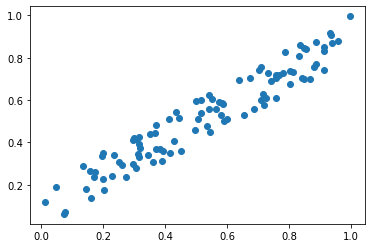

In [44]:
n = 100
r = 0.8
x =np.random.rand(n)
y = r * x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')

In [45]:
np.corrcoef(x,y)

array([[1.        , 0.95777116],
       [0.95777116, 1.        ]])

In [46]:
np.sum((x - x.mean()) * (y - y.mean())) / np.sqrt(np.sum((x - x.mean()) ** 2) * np.sum((y - y.mean()) ** 2))

0.9577711550690517